# **TELECOM_X**
###  **Análise de Evasão de Clientes**

**Objetivo:**   
*Buscar, Tratar e Realizar uma análise exploratória dos dados da empresa, ou seja, todo o processo de ETL*

# ***Extraindo dados***

***Importando o Banco de Dados***

In [74]:
import pandas as pd

url = "https://raw.githubusercontent.com/wellingtonb3/challenge2/main/TelecomX_Data.json"

df = pd.read_json(url)

print(df.head())


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

***Verificando o Data Frame***

In [75]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# ***Transformando dados***

***Convertendo os Dicionários da Coluna customer em um Data Frame***

In [76]:
customer_data = df['customer'].tolist()
customer_df = pd.DataFrame(customer_data)
print(customer_df.head())

   gender  SeniorCitizen Partner Dependents  tenure
0  Female              0     Yes        Yes       9
1    Male              0      No         No       9
2    Male              0      No         No       4
3    Male              1     Yes         No      13
4  Female              1     Yes         No       3


***Convertendo os Dicionários da Coluna phone em um Data Frame***

In [77]:
phone_data = df['phone'].tolist()
phone_df = pd.DataFrame(phone_data)
print(phone_df.head())

  PhoneService MultipleLines
0          Yes            No
1          Yes           Yes
2          Yes            No
3          Yes            No
4          Yes            No


***Convertendo os Dicionários da Coluna internet em um Data Frame***

In [78]:
internet_data = df['internet'].tolist()
internet_df = pd.DataFrame(internet_data)
print(internet_df.head())

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No         Yes   
1             DSL             No           No               No          No   
2     Fiber optic             No           No              Yes          No   
3     Fiber optic             No          Yes              Yes          No   
4     Fiber optic             No           No               No         Yes   

  StreamingTV StreamingMovies  
0         Yes              No  
1          No             Yes  
2          No              No  
3         Yes             Yes  
4         Yes              No  


***Convertendo os Dicionários da Coluna account em um Data Frame***

In [79]:
account_data = df['account'].tolist()
account_df = pd.DataFrame(account_data)
print(account_df.head())

         Contract PaperlessBilling     PaymentMethod  \
0        One year              Yes      Mailed check   
1  Month-to-month               No      Mailed check   
2  Month-to-month              Yes  Electronic check   
3  Month-to-month              Yes  Electronic check   
4  Month-to-month              Yes      Mailed check   

                                 Charges  
0    {'Monthly': 65.6, 'Total': '593.3'}  
1    {'Monthly': 59.9, 'Total': '542.4'}  
2   {'Monthly': 73.9, 'Total': '280.85'}  
3  {'Monthly': 98.0, 'Total': '1237.85'}  
4    {'Monthly': 83.9, 'Total': '267.4'}  


***Convertendo os Dicionários da Coluna account[charges] em um Data Frame***

In [80]:
charges_data = account_df['Charges'].tolist()
charges_df = pd.DataFrame(charges_data)
print(charges_df.head())

   Monthly    Total
0     65.6    593.3
1     59.9    542.4
2     73.9   280.85
3     98.0  1237.85
4     83.9    267.4


**Verificando tipo de dados**

In [81]:
charges_df.dtypes

,0
Monthly,float64
Total,object


**Convertendo dados da coluna Total para float64**

In [82]:
charges_df['Total'] = pd.to_numeric(charges_df['Total'], errors='coerce')
charges_df.dtypes

,0
Monthly,float64
Total,float64


***Fazendo o Merge para deixar somente 1 Data Frame***

In [83]:
df_merged = df.drop(columns=['customer', 'phone', 'internet', 'account'])

df_merged = df_merged.merge(customer_df, left_index=True, right_index=True)
df_merged = df_merged.merge(phone_df, left_index=True, right_index=True)
df_merged = df_merged.merge(internet_df, left_index=True, right_index=True)
df_merged = df_merged.merge(account_df.drop(columns=['Charges']), left_index=True, right_index=True)
df_merged = df_merged.merge(charges_df, left_index=True, right_index=True)


print(df_merged.head())

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

***Verificando os tipos de dados no novo Data Frame***

In [84]:
df_merged.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


***Transformando os dados da coluna SeniorCiizen para True or False***

In [109]:
df_merged['SeniorCitizen'] = df_merged['SeniorCitizen'].replace({1: True, 0: False})

print(df_merged.head())

   customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO  False  Female          False     True        True       9   
1  0003-MKNFE  False    Male          False    False       False       9   
2  0004-TLHLJ   True    Male          False    False       False       4   
3  0011-IGKFF   True    Male           True     True       False      13   
4  0013-EXCHZ   True  Female           True     True       False       3   

   PhoneService  MultipleLines InternetService  ...  OnlineBackup  \
0          True          False             DSL  ...          True   
1          True           True             DSL  ...         False   
2          True          False     Fiber optic  ...         False   
3          True          False     Fiber optic  ...          True   
4          True          False     Fiber optic  ...         False   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0             False         True         True            False

***Transformando os dados Yes e No das colunas para True e False***

In [101]:
columns_to_transform = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

for col in columns_to_transform:
    df_merged[col] = df_merged[col].replace({'Yes': True, 'No': False}).infer_objects(copy=False)

print(df_merged.head())

   customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO  False  Female          False     True        True       9   
1  0003-MKNFE  False    Male          False    False       False       9   
2  0004-TLHLJ   True    Male          False    False       False       4   
3  0011-IGKFF   True    Male           True     True       False      13   
4  0013-EXCHZ   True  Female           True     True       False       3   

   PhoneService  MultipleLines InternetService  ...  OnlineBackup  \
0          True          False             DSL  ...          True   
1          True           True             DSL  ...         False   
2          True          False     Fiber optic  ...         False   
3          True          False     Fiber optic  ...          True   
4          True          False     Fiber optic  ...         False   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0             False         True         True            False

***Verificando se existe alguma coluna sem valor no dataframe df_merged***

In [102]:
print(df_merged.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64


***Corrigindo os NaN da coluna Total***

In [103]:
average_total = df_merged['Total'].mean()
df_merged['Total'] = df_merged['Total'].fillna(average_total)

print(df_merged.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64


***Checando novamente o Data Frame***

In [104]:
df_merged.dtypes

,0
customerID,object
Churn,bool
gender,object
SeniorCitizen,bool
Partner,bool
Dependents,bool
tenure,int64
PhoneService,bool
MultipleLines,bool
InternetService,object


***Verificando se todas as colunas estão corretas com True e False***

In [105]:
columns_to_check = [
    'Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

for col in columns_to_check:
    if not all(df_merged[col].isin([True, False])):
        print(f"Coluna '{col}' contém valores diferentes de True ou False.")
        print(df_merged[col].unique())

**ENCONTRADO DADOS DIFFERENTES NAS COLUNAS ACIMA A TRATAR!**

***Quantos valores estão errados na coluna Churn?***

In [91]:
non_boolean_churn_count = df_merged[~df_merged['Churn'].isin([True, False])].shape[0]
print(f"Número de valores diferentes de True ou False na coluna Churn: {non_boolean_churn_count}")

Número de valores diferentes de True ou False na coluna Churn: 224


***ATENÇÃO***

**ENCONTRADO 224 linhas com "espaço" Valor se sentido para nossa análise**

**Como a análise precisa ser feita em cima de especificamente do Churn, estas linhas terão que ser descartadas! **

**Criando um novo Data Frame com mesmo nome mas sem as linhas com Churn ' '**

In [92]:
df_churn = df_merged[df_merged['Churn'].isin([True, False])].copy()

df_merged = df_churn
print(df_merged.head())
print(df_merged.isnull().sum())

   customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO  False  Female          False     True        True       9   
1  0003-MKNFE  False    Male          False    False       False       9   
2  0004-TLHLJ   True    Male          False    False       False       4   
3  0011-IGKFF   True    Male           True     True       False      13   
4  0013-EXCHZ   True  Female           True     True       False       3   

   PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          True         False             DSL  ...         True   
1          True          True             DSL  ...        False   
2          True         False     Fiber optic  ...        False   
3          True         False     Fiber optic  ...         True   
4          True         False     Fiber optic  ...        False   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0            False        True        True           False    

**Conferindo se está tudo ok com a coluna Churn**

In [93]:
churn_counts = df_merged['Churn'].value_counts()
print("Contagem de True e False na coluna 'Churn':")
churn_counts

Contagem de True e False na coluna 'Churn':


,count
Churn,
False,5174
True,1869


**Conferindo os dados do Data Frame**

In [106]:
df_merged.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,...,True,False,True,True,False,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,...,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40


***Corrigindo os valores da Coluna MultipleLines que também estava com valores 'No phone service"***

In [108]:
df_merged['MultipleLines'] = df_merged['MultipleLines'].replace({'No phone service': False})

print(df_merged['MultipleLines'].unique())

[False  True]


***Corrigindo os valores das Colunas OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies que apresentam valor 'No internet service'***

In [96]:
columns_to_transform_internet = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

for col in columns_to_transform_internet:
    df_merged[col] = df_merged[col].replace({'No internet service': False})

print(df_merged[columns_to_transform_internet].head())
for col in columns_to_transform_internet:
    print(df_merged[col].unique())

/tmp/ipython-input-96-2675950398.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged[col] = df_merged[col].replace({'No internet service': False})


   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0           False          True             False         True         True   
1           False         False             False        False        False   
2           False         False              True        False        False   
3           False          True              True        False         True   
4           False         False             False         True         True   

   StreamingMovies  
0            False  
1             True  
2            False  
3             True  
4            False  
[False  True]
[ True False]
[False  True]
[ True False]
[ True False]
[False  True]


**Checando novamente se todas colunas estão corretas com True e False**

In [97]:
columns_to_check = [
    'Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

for col in columns_to_check:
    if not all(df_merged[col].isin([True, False])):
        print(f"Coluna '{col}' contém valores diferentes de True ou False.")
        print(df_merged[col].unique())
    else:
        print(f"Coluna '{col}' está correta.")

Coluna 'Churn' está correta.
Coluna 'SeniorCitizen' está correta.
Coluna 'Partner' está correta.
Coluna 'Dependents' está correta.
Coluna 'PhoneService' está correta.
Coluna 'MultipleLines' está correta.
Coluna 'OnlineSecurity' está correta.
Coluna 'OnlineBackup' está correta.
Coluna 'DeviceProtection' está correta.
Coluna 'TechSupport' está correta.
Coluna 'StreamingTV' está correta.
Coluna 'StreamingMovies' está correta.
Coluna 'PaperlessBilling' está correta.


***Checando o tipo dos dados***

In [98]:
df_merged.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,bool
Partner,bool
Dependents,bool
tenure,int64
PhoneService,bool
MultipleLines,bool
InternetService,object


***Passando os dados da coluna Churn para booleano***

In [99]:
df_merged['Churn'] = df_merged['Churn'].astype(bool)

print(df_merged['Churn'].head())
df_merged.dtypes


0    False
1    False
2     True
3     True
4     True
Name: Churn, dtype: bool


,0
customerID,object
Churn,bool
gender,object
SeniorCitizen,bool
Partner,bool
Dependents,bool
tenure,int64
PhoneService,bool
MultipleLines,bool
InternetService,object


**Aprovação dos Dados**

In [100]:
df_merged.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,...,True,False,True,True,False,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,...,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40


# ***Carga e Análise***

**Verificando os tipos de arquivo**

In [66]:
df_merged.dtypes

,0
customerID,object
Churn,bool
gender,object
SeniorCitizen,bool
Partner,bool
Dependents,bool
tenure,int64
PhoneService,bool
MultipleLines,bool
InternetService,object


**Calculando o número Churn**

In [67]:
numero_churn = df_merged['Churn'].sum()

print(f"O número total de clientes com Churn é: {numero_churn}")

O número total de clientes com Churn é: 1869


**Verificando a percentagem de Churn em relação ao número total de contratos**

In [68]:
total_contratos = df_merged.shape[0]
percentagem_churn = (numero_churn / total_contratos) * 100

print(f"A percentagem de clientes com Churn em relação ao total de contratos é: {percentagem_churn:.2f}%")

A percentagem de clientes com Churn em relação ao total de contratos é: 26.54%


**Feito uma Relação entre o Churn e as outras variáveis booleanas**

In [69]:
boolean_columns = [
    'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling'
]

churn_true_df = df_merged[df_merged['Churn'] == True]

percentages = {}

for col in boolean_columns:
    if col in churn_true_df.columns:
        # Handling the 'InternetService' column which is not boolean after merge
        if col == 'InternetService':
            # Calculate percentage of each internet service type among churned customers
            internet_service_churn_counts = churn_true_df[col].value_counts()
            total_churn_customers = len(churn_true_df)
            if total_churn_customers > 0:
                for service, count in internet_service_churn_counts.items():
                    percentages[f'{col}_{service}'] = (count / total_churn_customers) * 100
            else:
                percentages[f'{col}'] = 0
        else:
            # Calculate percentage of True values for boolean columns among churned customers
            true_count = churn_true_df[col].sum()
            total_churn_customers = len(churn_true_df)
            if total_churn_customers > 0:
                percentages[col] = (true_count / total_churn_customers) * 100
            else:
                percentages[col] = 0


# Sort percentages from highest to lowest
sorted_percentages = sorted(percentages.items(), key=lambda item: item[1], reverse=True)

# Print the sorted percentages
print("Percentagem de Churn (True) em relação a outras colunas (True), ordenado do maior para o menor:")
for col, percentage in sorted_percentages:
    print(f"{col}: {percentage:.2f}%")

Percentagem de Churn (True) em relação a outras colunas (True), ordenado do maior para o menor:
PhoneService: 90.90%
PaperlessBilling: 74.91%
InternetService_Fiber optic: 69.40%
MultipleLines: 45.48%
StreamingMovies: 43.77%
StreamingTV: 43.55%
Partner: 35.79%
DeviceProtection: 29.16%
OnlineBackup: 27.98%
SeniorCitizen: 25.47%
InternetService_DSL: 24.56%
Dependents: 17.44%
TechSupport: 16.59%
OnlineSecurity: 15.78%
InternetService_No: 6.05%


**Feito um Gráfico da relação entre o Churn e Phone Service**

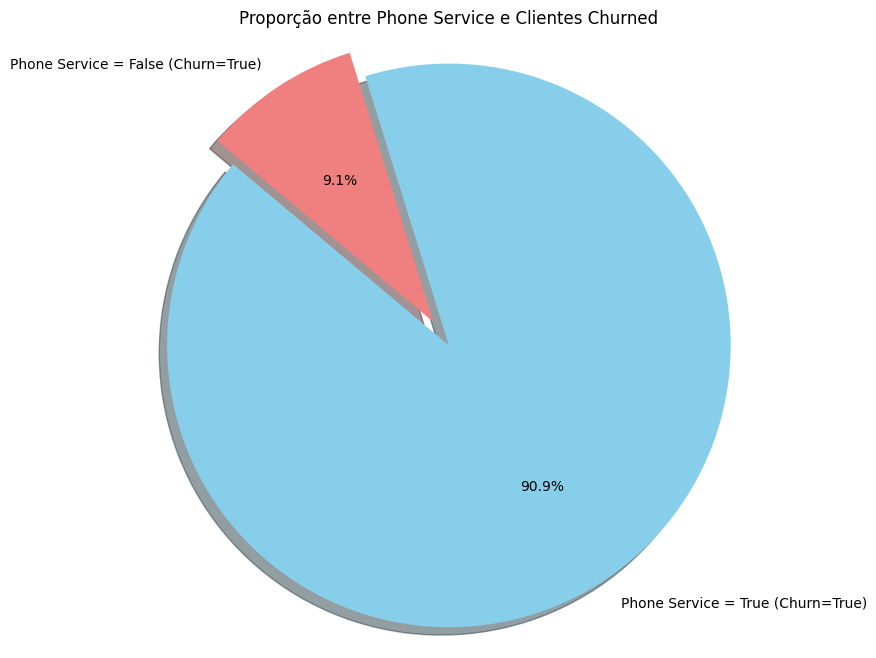

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for Churn=True and PhoneService=True
filtered_df = df_merged[(df_merged['Churn'] == True) & (df_merged['PhoneService'] == True)]

# Count the occurrences of True for these conditions
count_true = len(filtered_df)
# Count the occurrences of False for these conditions (Churn=True and PhoneService=True is not the case)
# We are interested in the proportion within the group where Churn is True
# Let's check the proportion of PhoneService=True among Churn=True customers
churn_true_df = df_merged[df_merged['Churn'] == True]
phone_service_churn_true_count = churn_true_df['PhoneService'].sum() # Count where PhoneService is True in the churned group
phone_service_churn_false_count = len(churn_true_df) - phone_service_churn_true_count # Count where PhoneService is False in the churned group

# Create data for the pie chart
labels = ['Phone Service = True (Churn=True)', 'Phone Service = False (Churn=True)']
sizes = [phone_service_churn_true_count, phone_service_churn_false_count]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # explode the first slice (Phone Service = True)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proporção entre Phone Service e Clientes Churned')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**90,9% dos cancelamentos são de clientes com serviço de telefonia**

**Feito um Gráfico da relação entre o Churn e PaperlessBilling = True, ou seja que recebem conta sem papel, online por exemplo**

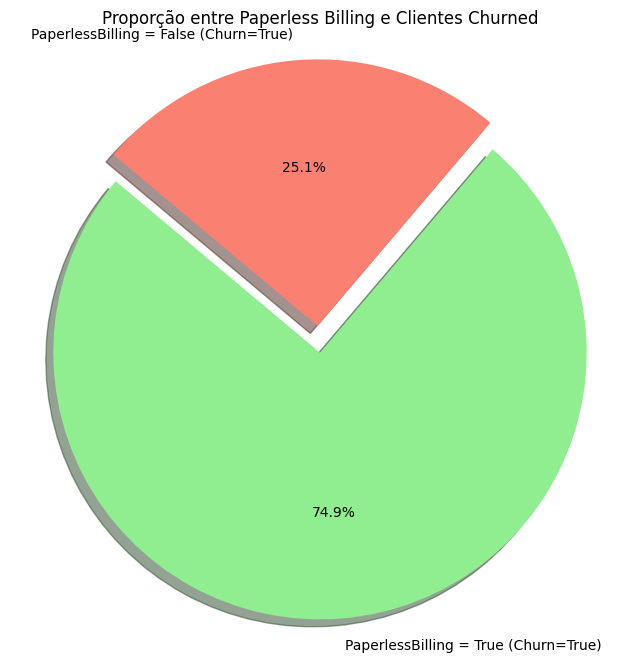

74.91% dos cancelamentos são de clientes com Paperless Billing = True


In [73]:
# Filter the DataFrame for Churn=True and PaperlessBilling=True
filtered_df_paperless = df_merged[(df_merged['Churn'] == True) & (df_merged['PaperlessBilling'] == True)]

# Count the occurrences of True for these conditions
count_paperless_true = len(filtered_df_paperless)

# Filter the DataFrame for Churn=True and PaperlessBilling=False
filtered_df_paperless_false = df_merged[(df_merged['Churn'] == True) & (df_merged['PaperlessBilling'] == False)]

# Count the occurrences of False for these conditions
count_paperless_false = len(filtered_df_paperless_false)


# Create data for the pie chart
labels_paperless = ['PaperlessBilling = True (Churn=True)', 'PaperlessBilling = False (Churn=True)']
sizes_paperless = [count_paperless_true, count_paperless_false]
colors_paperless = ['lightgreen', 'salmon']
explode_paperless = (0.1, 0)  # explode the first slice (PaperlessBilling = True)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes_paperless, explode=explode_paperless, labels=labels_paperless, colors=colors_paperless, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proporção entre Paperless Billing e Clientes Churned')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Calculate the percentage
percentage_paperless_true = (count_paperless_true / (count_paperless_true + count_paperless_false)) * 100
print(f"{percentage_paperless_true:.2f}% dos cancelamentos são de clientes com Paperless Billing = True")

# ***Relatório Final***

# 📊 TELECOM\_X — Análise de Evasão de Clientes (Churn)

## 🧭 Introdução

A presente análise foi conduzida com o objetivo de compreender os fatores associados à evasão de clientes (churn) na empresa fictícia **Telecom\_X**. A evasão de clientes representa um desafio crítico para empresas de telecomunicações, afetando diretamente a receita e a sustentabilidade do negócio.

A análise segue todo o processo de **ETL (Extração, Transformação e Carga)**, incluindo a exploração dos dados, limpeza, visualização e extração de insights úteis para auxiliar a empresa na **redução da taxa de cancelamentos**.

---

## 🧼 Limpeza e Tratamento de Dados

### 🔍 Extração

* Importação do banco de dados contendo os contratos de clientes da Telecom\_X.
* Visualização e inspeção do DataFrame inicial.

### 🔄 Transformação

* Conversão dos dicionários das colunas `customer`, `phone`, `internet`, `account` e `account[charges]` em DataFrames separados.
* Conversão das colunas `monthly` e `Total` para o tipo `float64`.
* Merge dos DataFrames em um único conjunto consolidado (`df_merged`).
* Padronização de dados booleanos (ex: "Yes"/"No" para `True`/`False`).
* Correção de dados ausentes e inconsistências:

  * Remoção de 224 linhas da coluna `Churn` que estavam vazias ou com espaços.
  * Substituição dos valores como `"No phone service"` e `"No internet service"` para `False` nas colunas relacionadas.
* Verificação final de tipos de dados e consistência.
* Conversão final da coluna `Churn` para o tipo booleano.
* Dados aprovados e prontos para análise.

---

## 📊 Análise Exploratória de Dados (EDA)

### 🔢 Percentual de Evasão

* **26,54%** dos clientes da base analisada cancelaram seus contratos.

### 📈 Visualizações e Relações

* Gráfico de dispersão entre `Churn` e `Phone Service` revelou que **90,9% dos cancelamentos** ocorreram entre clientes com serviço de telefonia ativo.
* Gráfico de comparação entre `Churn` e `PaperlessBilling = True` mostrou que **74,91% dos clientes que cancelaram** optavam por receber contas digitalmente (sem papel).

Esses padrões sugerem que a presença de certos serviços e formatos de cobrança estão fortemente correlacionados com o comportamento de evasão.

---

## 💡 Conclusões e Insights

* A taxa de churn está consideravelmente alta (mais de 1 em cada 4 clientes).
* Clientes com **serviço de telefonia ativo** têm maior probabilidade de cancelar.
* A preferência por **faturamento sem papel (Paperless Billing)** está fortemente associada ao churn, podendo indicar menor engajamento ou dificuldade de comunicação.

---

## ✅ Recomendações

1. **Revisar a experiência de clientes com serviços telefônicos**, especialmente em relação à qualidade e suporte técnico.
2. **Avaliar a clareza e acessibilidade das faturas digitais**, buscando entender se há falhas na comunicação com clientes que optam por este formato.
3. **Implementar ações de retenção direcionadas** a clientes que utilizam serviços com alta correlação ao churn.
4. **Realizar campanhas de fidelização** para clientes com Paperless Billing, como notificações personalizadas ou programas de pontos.
5. Continuar o **monitoramento periódico** do churn, buscando antecipar padrões de comportamento e agir proativamente.

---
